# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [145]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from random import sample
from citipy import citipy
import scipy.stats as st
from pprint import pprint

# # Import API key
weather_api_key = "2eb3254c239c9ed5d96adab55af34838"

# # Range of latitudes and longitudes
lat_range = np.random.uniform(low=-90.000, high=90.000, size=2000)
lng_range = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [146]:
# Pair coordinates with zip codes
longitudes = []
latitudes = []
coordinates = list(zip(lat_range,lng_range))
len(coordinates)

2000

In [147]:
# Import cities
city_list = []

for entry in coordinates:
    cityname = citipy.nearest_city(entry[0],entry[1]).city_name
    if cityname not in city_list:
        city_list.append(cityname)

len(city_list)

753

In [148]:
# Set up loop & API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Containers
city_names = []
city_lats = []
city_longs = []
country = []
time_zone = []
city_count = 0

for city in city_list:
    response = requests.get(f"{url}{weather_api_key}&q={city}").json()
    try:
        city_names.append(response["name"])
        city_lats.append(response["coord"]['lat'])
        city_longs.append(response["coord"]['lon'])
        country.append(response["sys"]["country"])
        time_zone.append(response["timezone"])
        print(f"{city_count} Information for {city} successfully retreived")
        city_count += 1
    except (KeyError, IndexError):
        print(f'FAIL: Unable to retrive information for {city}')
        

0 Information for tautira successfully retreived
1 Information for butaritari successfully retreived
2 Information for tezu successfully retreived
3 Information for luderitz successfully retreived
4 Information for teknaf successfully retreived
5 Information for puerto ayora successfully retreived
6 Information for albany successfully retreived
7 Information for wonthaggi successfully retreived
8 Information for mahebourg successfully retreived
9 Information for cururupu successfully retreived
10 Information for kapaa successfully retreived
11 Information for guerrero negro successfully retreived
12 Information for ziro successfully retreived
13 Information for ixtapa successfully retreived
14 Information for panama city successfully retreived
15 Information for saskylakh successfully retreived
16 Information for rikitea successfully retreived
17 Information for kutum successfully retreived
18 Information for visby successfully retreived
19 Information for coihaique successfully retrei

In [149]:
# Converting to a dataframe
city_data = pd.DataFrame.from_dict({"City Name":city_names, "Latitude":city_lats, "Longitude":city_longs, "Country":country, "UTC +/- (Hours)":np.array(time_zone)/3600})
display(city_data)

,City Name,Latitude,Longitude,Country,UTC +/- (Hours)
0,Tautira,-17.7333,-149.1500,PF,-10.0
1,Butaritari,3.0707,172.7902,KI,12.0
2,Tezu,27.9167,96.1667,IN,5.5
3,Lüderitz,-26.6481,15.1594,NA,2.0
4,Teknāf,20.8624,92.3058,BD,6.0
...,...,...,...,...,...
678,Verkhnyaya Toyma,62.2349,44.9985,RU,3.0
679,Seeboden,46.8219,13.4950,AT,2.0
680,Anloga,5.7947,0.8973,GH,0.0
681,Tanete,-3.9443,119.7848,ID,8.0


In [150]:
#Save df to a CSV
city_data.to_csv(r'..\\output_data\\City_data.csv')

In [155]:
# Set up containers
onecall = "https://api.openweathermap.org/data/2.5/onecall?"
city_data["Max Temperature"] = ""
city_data["Humidity"] = ""
city_data["Cloudiness"] = ""
city_data["Wind Speed"] = ""
exclude = "current,minutely,hourly,alerts"
city_counts =1

# Loop through city list
for index, row in city_data.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    onecallresponse = (requests.get(f"{onecall}lat={lat}&lon={lon}&exclude={exclude}&appid={weather_api_key}&units=imperial").json()
                       ['daily'][0])
    
    # Add information
    try:
        city_data.loc[index, 'Max Temperature'] = onecallresponse['temp']['max']
        city_data.loc[index, 'Humidity'] = onecallresponse['humidity']
        city_data.loc[index, 'Cloudiness'] = onecallresponse['clouds']
        city_data.loc[index, 'Wind Speed'] = onecallresponse['wind_speed']
        print(f'{city_counts} Information successfully retreived for {city_data.loc[index,"City Name"]}')
        city_counts += 1
        
    # On error report the failure to log
    except (KeyError, IndexError, SSLEOFError,SSLError):
        print(f'FAIL: Unable to retrieve information for {city_data.loc[index,"City Name"]}')
              
display(city_data)

1 Information successfully retreived for Tautira
2 Information successfully retreived for Butaritari
3 Information successfully retreived for Tezu
4 Information successfully retreived for Lüderitz
5 Information successfully retreived for Teknāf
6 Information successfully retreived for Puerto Ayora
7 Information successfully retreived for Albany
8 Information successfully retreived for Wonthaggi
9 Information successfully retreived for Mahébourg
10 Information successfully retreived for Cururupu
11 Information successfully retreived for Kapaa
12 Information successfully retreived for Guerrero Negro
13 Information successfully retreived for Ziro
14 Information successfully retreived for Ixtapa
15 Information successfully retreived for Panama City
16 Information successfully retreived for Saskylakh
17 Information successfully retreived for Rikitea
18 Information successfully retreived for Kutum
19 Information successfully retreived for Visby
20 Information successfully retreived for Coyha

,City Name,Latitude,Longitude,Country,UTC +/- (Hours),Max Temperature,Humidity,Cloudiness,Wind Speed
0,Tautira,-17.7333,-149.1500,PF,-10.0,82.42,77,26,16.04
1,Butaritari,3.0707,172.7902,KI,12.0,84.16,70,9,20.83
2,Tezu,27.9167,96.1667,IN,5.5,94.77,53,40,4.21
3,Lüderitz,-26.6481,15.1594,NA,2.0,63.01,58,0,20.54
4,Teknāf,20.8624,92.3058,BD,6.0,86.9,70,80,19.69
...,...,...,...,...,...,...,...,...,...
678,Verkhnyaya Toyma,62.2349,44.9985,RU,3.0,50.52,71,95,6.44
679,Seeboden,46.8219,13.4950,AT,2.0,73.54,50,72,5.12
680,Anloga,5.7947,0.8973,GH,0.0,80.08,81,100,15.61
681,Tanete,-3.9443,119.7848,ID,8.0,86.16,67,98,7.65


In [157]:
# Save to a CSV
city_data.to_csv(r'..\\output_data\\Weather_Forecast.csv')


In [167]:
# Import data
city_data = pd.read_csv(r'..\\output_data\\Weather_Forecast.csv').drop(labels="Unnamed: 0",axis=1)
city_data


,City Name,Latitude,Longitude,Country,UTC +/- (Hours),Max Temperature,Humidity,Cloudiness,Wind Speed
0,Tautira,-17.7333,-149.1500,PF,-10.0,82.42,77,26,16.04
1,Butaritari,3.0707,172.7902,KI,12.0,84.16,70,9,20.83
2,Tezu,27.9167,96.1667,IN,5.5,94.77,53,40,4.21
3,Lüderitz,-26.6481,15.1594,NaN,2.0,63.01,58,0,20.54
4,Teknāf,20.8624,92.3058,BD,6.0,86.90,70,80,19.69
...,...,...,...,...,...,...,...,...,...
678,Verkhnyaya Toyma,62.2349,44.9985,RU,3.0,50.52,71,95,6.44
679,Seeboden,46.8219,13.4950,AT,2.0,73.54,50,72,5.12
680,Anloga,5.7947,0.8973,GH,0.0,80.08,81,100,15.61
681,Tanete,-3.9443,119.7848,ID,8.0,86.16,67,98,7.65


In [168]:
# Conversions
city_data["Max Temperature"] = pd.to_numeric(city_data["Max Temperature"])
city_data["Humidity"] = pd.to_numeric(city_data["Humidity"])
city_data["Cloudiness"] = pd.to_numeric(city_data["Cloudiness"])
city_data["Wind Speed"] = pd.to_numeric(city_data["Wind Speed"])
city_data = city_data.rename(columns={"Wind Speed": "Wind Speed (MPH)","Max Temperature":"Max Temperature (F)"})

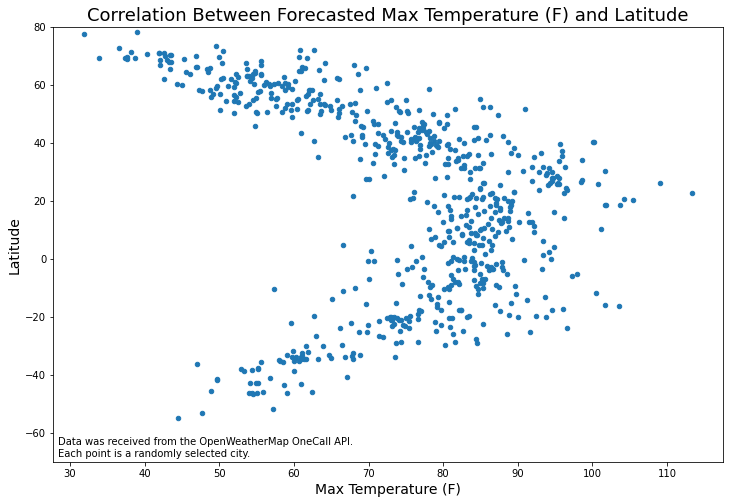

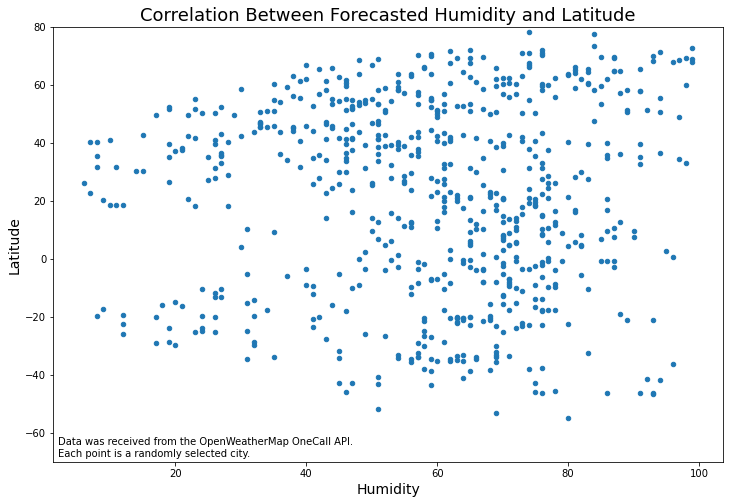

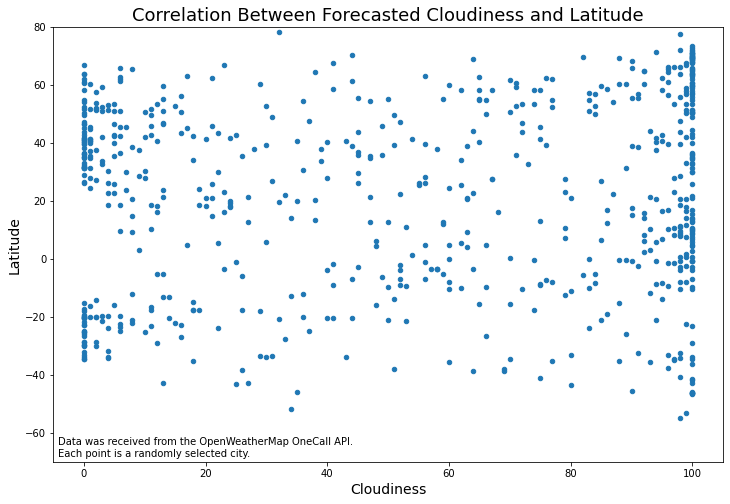

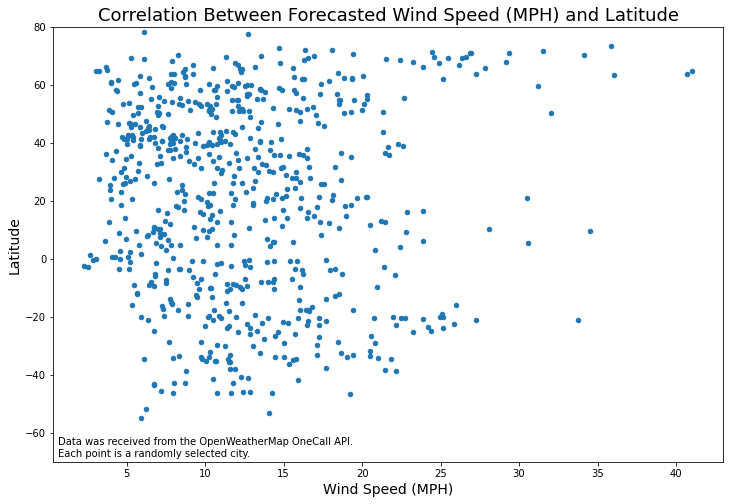

In [169]:
comparelist = ['Max Temperature (F)','Humidity','Cloudiness','Wind Speed (MPH)']

#Create a loop to make all plots
for element in comparelist:
    #generate the base plot
    city_data.plot.scatter(element,"Latitude", figsize = (12,8),ylim=(-70,80))
    
    #improve the format of each visualization
    plt.title(f'Correlation Between Forecasted {element} and Latitude', fontsize=18)
    plt.annotate(f'''Data was received from the OpenWeatherMap OneCall API.
Each point is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    plt.xlabel(f'{element}',fontsize=14)
    plt.ylabel('Latitude',fontsize=14)
    
    # Save the visualization to a png file
    imagename = f"..\\Images\\Global{element}vslat.png"
    plt.savefig(imagename)

In [170]:
# Split into hemispheres
southern_hemisphere = pd.DataFrame
southern_hemisphere =city_data[city_data['Latitude']<0]

northern_hemisphere = pd.DataFrame
northern_hemisphere = city_data[city_data['Latitude']>0]

#Check for correlations
display(southern_hemisphere.corr())
display(northern_hemisphere.corr())

,Latitude,Longitude,UTC +/- (Hours),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
Latitude,1.000000,-0.059384,-0.101880,0.755326,-0.012060,0.069365,-0.110786
Longitude,-0.059384,1.000000,0.962285,-0.102579,0.020075,0.132071,-0.047845
UTC +/- (Hours),-0.101880,0.962285,1.000000,-0.143239,0.050434,0.162301,-0.002479
Max Temperature (F),0.755326,-0.102579,-0.143239,1.000000,-0.416716,-0.200233,-0.150033
Humidity,-0.012060,0.020075,0.050434,-0.416716,1.000000,0.495691,0.131284
Cloudiness,0.069365,0.132071,0.162301,-0.200233,0.495691,1.000000,-0.114893
Wind Speed (MPH),-0.110786,-0.047845,-0.002479,-0.150033,0.131284,-0.114893,1.000000


,Latitude,Longitude,UTC +/- (Hours),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
Latitude,1.000000,-0.023754,0.061975,-0.787931,0.010781,0.036170,0.181290
Longitude,-0.023754,1.000000,0.938454,-0.003729,-0.036271,0.039823,0.069199
UTC +/- (Hours),0.061975,0.938454,1.000000,-0.082597,-0.010910,0.063728,0.058165
Max Temperature (F),-0.787931,-0.003729,-0.082597,1.000000,-0.431757,-0.349775,-0.191837
Humidity,0.010781,-0.036271,-0.010910,-0.431757,1.000000,0.642900,0.105147
Cloudiness,0.036170,0.039823,0.063728,-0.349775,0.642900,1.000000,0.091070
Wind Speed (MPH),0.181290,0.069199,0.058165,-0.191837,0.105147,0.091070,1.000000


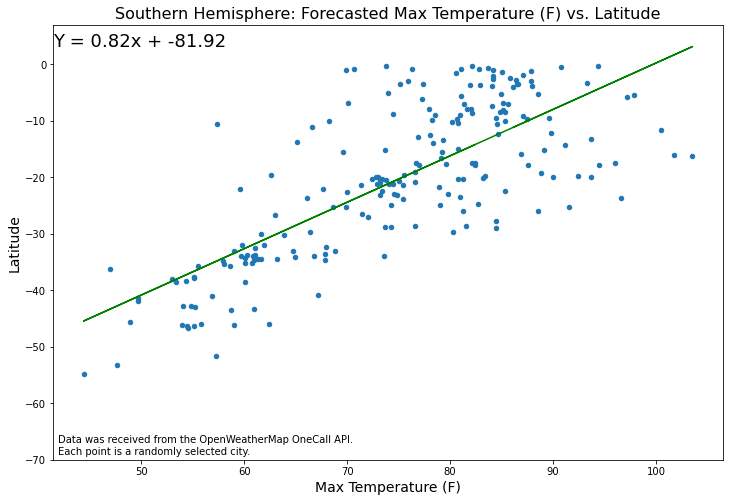

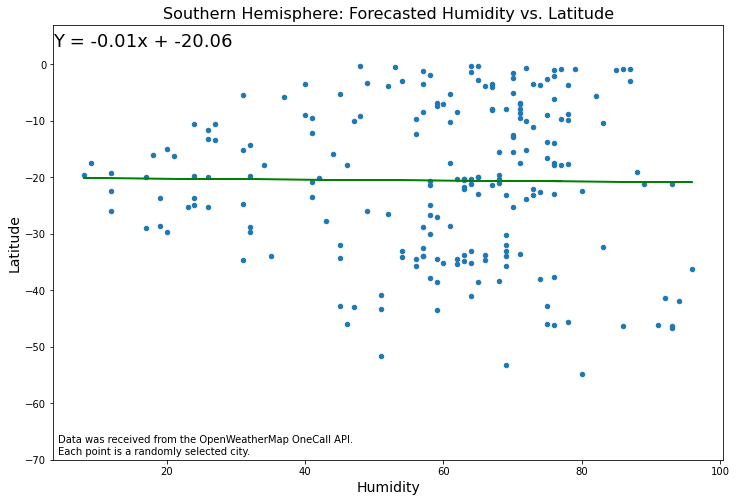

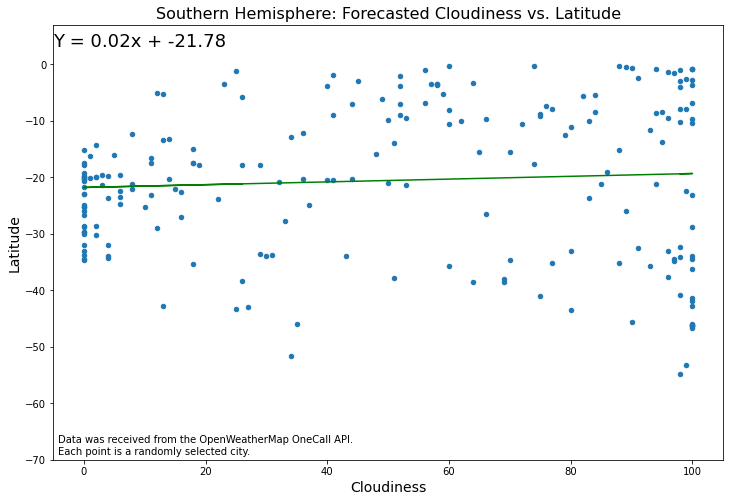

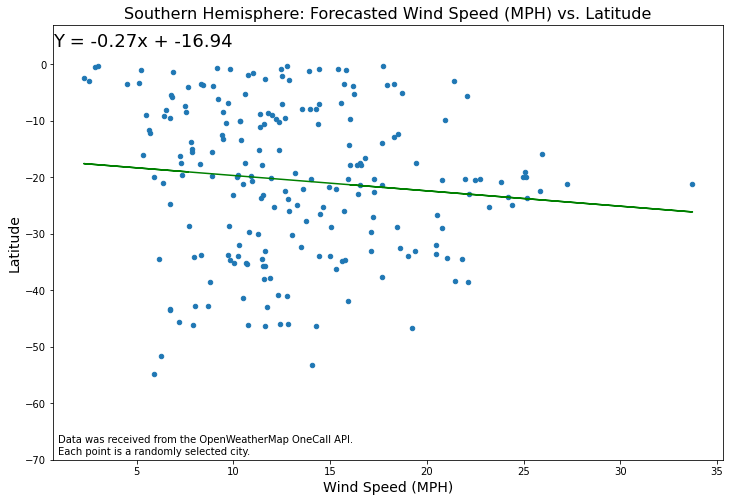

In [171]:
# Southern Hemisphere Visualizations

# Create loop to make plots
for element in comparelist:
    #Generate the base plot
    southern_hemisphere.plot.scatter(element,"Latitude", figsize = (12,8),ylim = (-70,7))
   
    # linear regression and plot
    varaxis = southern_hemisphere[f"{element}"]
    (m,b,rvalue,pvalue,stderr) = st.linregress(varaxis,southern_hemisphere["Latitude"])
    linearfit = m * varaxis + b
    plt.plot(varaxis,linearfit,'green')
    
    # Improve the format
    regression = "Y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.annotate(regression,xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    plt.title(f'Southern Hemisphere: Forecasted {element} vs. Latitude', fontsize =16)
    plt.annotate(f'''Data was received from the OpenWeatherMap OneCall API.
Each point is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    plt.xlabel(f'{element}',fontsize=14)
    plt.ylabel('Latitude',fontsize=14)
    
    # Save to file
    imagename = f"..\\Images\\SH_{element}vslat.png"
    plt.savefig(imagename)

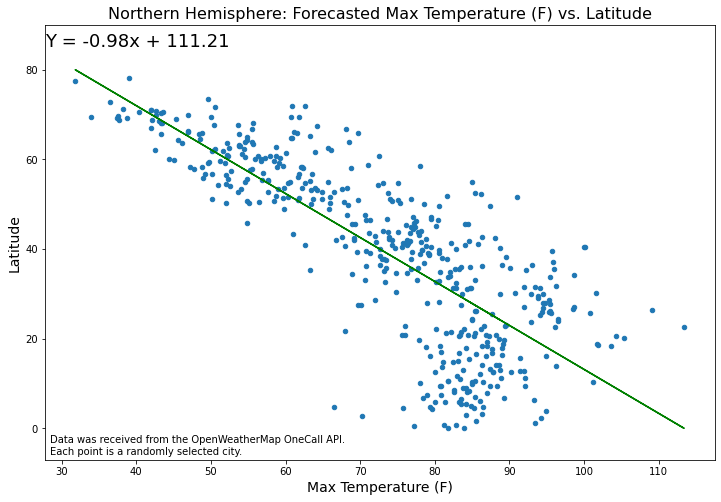

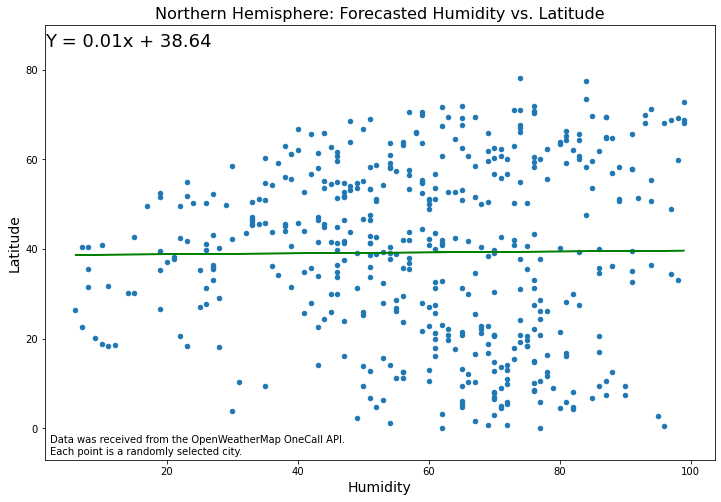

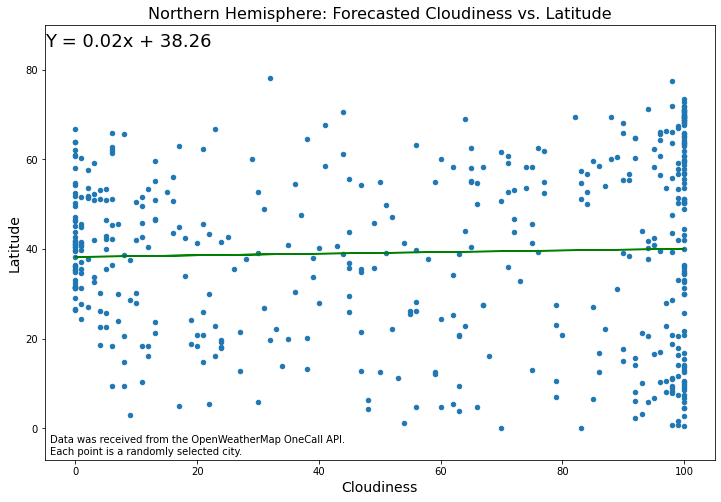

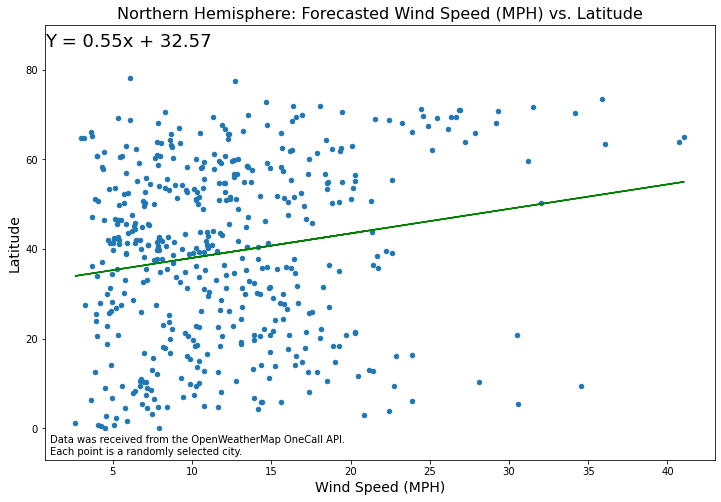

In [172]:
# Northern Hemisphere Visualizations

# Create loop to make plots
for element in comparelist:
    # Generate the base plot
    northern_hemisphere.plot.scatter(element,"Latitude", figsize = (12,8),ylim = (-7,90))
   
    # perform linear regression and plot the resulting equation
    varaxis = northern_hemisphere[f"{element}"]
    (m,b,rvalue,pvalue,stderr) = st.linregress(varaxis,northern_hemisphere["Latitude"])
    linearfit = m * varaxis + b
    plt.plot(varaxis,linearfit,'green')
    
    #Improve the format of the visualization
    regression = "Y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.annotate(regression,xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    plt.title(f'Northern Hemisphere: Forecasted {element} vs. Latitude', fontsize =16)
    plt.annotate(f'''Data was received from the OpenWeatherMap OneCall API.
Each point is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    plt.xlabel(f'{element}',fontsize=14)
    plt.ylabel('Latitude',fontsize=14)
    
    #Save to file
    imagename = f"..\\Images\\NH_{element}vslat.png"
    plt.savefig(imagename)